In [1]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
# import the necessary packages 
from tensorflow.keras.layers import Input

# Normal libraries
import pandas as pd
import numpy as np
import os
import shutil

# pickle
import pickle as pk
#import cv2

#
from IPython.display import Image

# visualization libraries
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# sklearn tensorflow.keras  libraries
from tensorflow.keras.models  import Sequential, load_model
from tensorflow.keras  import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import binary_crossentropy, categorical_crossentropy
from tensorflow.keras import optimizers



In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.utils import to_categorical



In [4]:
data_class_df = pd.read_csv('/Users/amateos88/code/vivekptl9/Anaemia_Classification/sample_dataset/sickle_slides_new_march.txt')
data_class_df.shape

(161, 2)

In [5]:
with open('/Users/amateos88/Desktop/Anaemia/pictures_array.npy', 'rb') as f:
    images = np.load(f)

In [6]:
with open('/Users/amateos88/Desktop/Anaemia/labels_array.npy', 'rb') as f:
    labels = np.load(f)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [8]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(224, 224, 3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(128, (3,3), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(1024, (2,2), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(1024, (5,5), padding='same', activation="sigmoid"))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(256, (2,2), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(512, (5,5), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(128, (2,2), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2))) 
# model.add(layers.Conv2D(1024, (2,2), padding='same', activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # intermediate layer
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                         

2022-09-02 16:26:50.978521: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-02 16:26:50.979353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-02 16:26:50.980004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
adam_opt = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99)
model.compile(loss ='binary_crossentropy',
              optimizer = adam_opt, #'adam', # adam_opt,
              metrics = [tf.keras.metrics.BinaryAccuracy()])

In [10]:
es = callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=40,  # Use early stopping in practice
                    batch_size=8, 
                    validation_split = 0.2,
                    shuffle= True,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40


2022-09-02 16:26:51.882462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 0.6855 - binary_accuracy: 0.5975

2022-09-02 16:26:56.481027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 6s 38ms/step - loss: 0.6855 - binary_accuracy: 0.5975 - val_loss: 0.6928 - val_binary_accuracy: 0.6084
Epoch 2/40
132/132 [==============================] - 5s 35ms/step - loss: 0.6925 - binary_accuracy: 0.6013 - val_loss: 0.6921 - val_binary_accuracy: 0.6084
Epoch 3/40
132/132 [==============================] - 4s 32ms/step - loss: 0.6918 - binary_accuracy: 0.6013 - val_loss: 0.6914 - val_binary_accuracy: 0.6084
Epoch 4/40
132/132 [==============================] - 4s 31ms/step - loss: 0.6912 - binary_accuracy: 0.6013 - val_loss: 0.6908 - val_binary_accuracy: 0.6084
Epoch 5/40
132/132 [==============================] - 4s 32ms/step - loss: 0.6906 - binary_accuracy: 0.6013 - val_loss: 0.6901 - val_binary_accuracy: 0.6084
Epoch 6/40
132/132 [==============================] - 4s 31ms/step - loss: 0.6901 - binary_accuracy: 0.6013 - val_loss: 0.6895 - val_binary_accuracy: 0.6084
Epoch 7/40
132/132 [==============================] - 4s 31ms/step - 

In [11]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 1s 35ms/step - loss: 0.6732 - binary_accuracy: 0.6241


[0.6732177138328552, 0.6241135001182556]

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KeyError: 'accuracy'

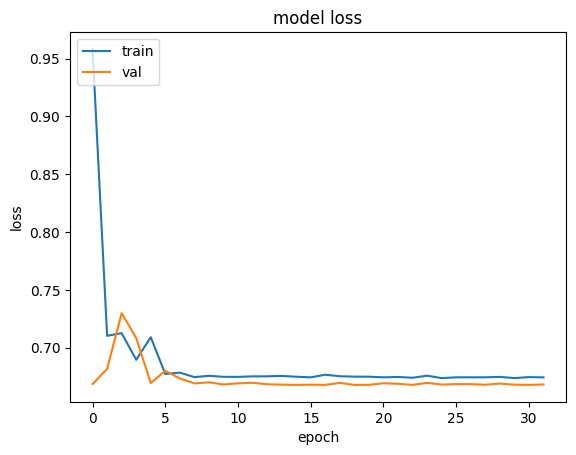

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()